In [2]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: dataset/test/
   creating: dataset/test/beard/
  inflating: dataset/test/beard/1.jpeg  
  inflating: dataset/test/beard/10.jpg  
  inflating: dataset/test/beard/11.jpg  
  inflating: dataset/test/beard/12.jpg  
  inflating: dataset/test/beard/13.jpg  
  inflating: dataset/test/beard/14.jpg  
  inflating: dataset/test/beard/15.jpg  
  inflating: dataset/test/beard/16.jpg  
  inflating: dataset/test/beard/17.jpg  
  inflating: dataset/test/beard/18.jpg  
  inflating: dataset/test/beard/19.jpg  
  inflating: dataset/test/beard/2.jpg  
  inflating: dataset/test/beard/20.jpg  
  inflating: dataset/test/beard/21.jpg  
  inflating: dataset/test/beard/22.jpg  
  inflating: dataset/test/beard/23.jpg  
  inflating: dataset/test/beard/24.jpg  
  inflating: dataset/test/beard/25.jpg  
  inflating: dataset/test/beard/26.jpg  
  inflating: dataset/test/beard/3.jpg  
  inflating: dataset/test/beard/4.jpg  
  inflating: dataset/test/beard/5.jpg  
  inflating

Creating directory for training and testing

In [14]:
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D, Conv2D,Flatten
from tensorflow.keras.models import Sequential

from IPython.display import clear_output
import warnings

warnings.filterwarnings('ignore')


In [15]:
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

SEED = 1
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32
EPOCHS = 7
LR = 0.00003

In [16]:
beard_or_not = os.listdir(train_dir)
n = len(beard_or_not)
print("Number of classification : ",n)

Number of classification :  2


In [17]:
beard = {}
train = test = 0
for clss in beard_or_not:
  num = len(os.listdir(os.path.join(train_dir,clss)))
  train+=num
  test+=len(os.listdir(os.path.join(test_dir,clss)))
  beard[clss] = num


Text(0.5, 1.0, 'Train and Test Images')

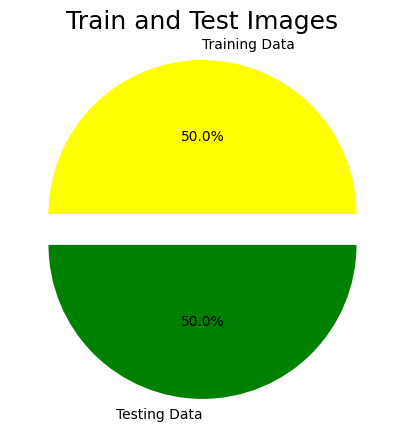

In [18]:
plt.figure(figsize=(8,5))
plt.pie(x = np.array([train,test]), autopct="%.1f%%",explode=[0.1,0.1],labels=["Training Data", "Testing Data"], pctdistance = 0.5, colors =['yellow','green'])
plt.title("Train and Test Images",fontsize = 18)

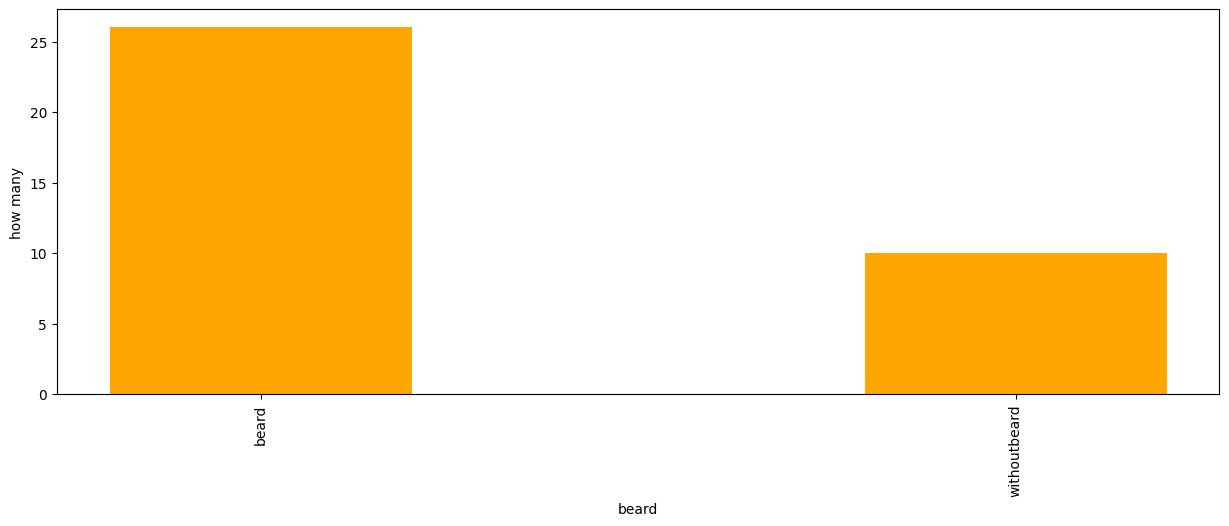

In [19]:
plt.figure(figsize=(15,5))
plt.bar(list(beard.keys()), list(beard.values()),width = 0.4, align ='center',color =['orange'])
plt.xticks(rotation = 90)

plt.xlabel("beard")
plt.ylabel("how many")
plt.show()

In [20]:
train_set = image_dataset_from_directory(
    train_dir,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    image_size = (64,64),
    shuffle = True,
    seed = SEED,
    validation_split = 0.2,
    subset = 'training'
)

Found 36 files belonging to 2 classes.
Using 29 files for training.


In [21]:
val_set = image_dataset_from_directory(
    train_dir,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    image_size = (64,64),
    shuffle = True,
    seed = SEED,
    validation_split =0.2,
    subset = 'validation',
)

Found 36 files belonging to 2 classes.
Using 7 files for validation.


In [22]:
test_set = image_dataset_from_directory(
    test_dir,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    image_size = (64,64),
    shuffle = False,
    seed = SEED,
)

Found 36 files belonging to 2 classes.


In [23]:
def transfer_learning():
  base_model = DenseNet121(include_top = False, input_shape = (64,64,3), weights = 'imagenet')

  thr = 149
  for layers in base_model.layers[:thr]:
    layers.trainable = False

  for layers in base_model.layers[thr:]:
    layers.trainable = False

  return base_model

In [24]:
def create_model():
  model = Sequential()

  base_model = transfer_learning()
  model.add(base_model)

  model.add(GlobalAveragePooling2D())


  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(512, activation = 'relu'))
  model.add(Dropout(0.2))

  model.add(Dense(1024, activation ='relu'))

  model.add(Dense(n, activation='softmax'))

  model.summary()

  return model

In [25]:
model = create_model()
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0 

In [27]:
history = model.fit(x = train_set,validation_data=val_set, epochs = 15)

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 2.0767 - accuracy: 0.7931 - val_loss: 2.7535e-04 - val_accuracy: 1.0000
Epoch 2/15
1/1 [==============================] - 1s 1s/step - loss: 0.8281 - accuracy: 0.8276 - val_loss: 0.3018 - val_accuracy: 0.8571
Epoch 3/15
1/1 [==============================] - 1s 1s/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 2.0789 - val_accuracy: 0.5714
Epoch 4/15
1/1 [==============================] - 1s 1s/step - loss: 0.3862 - accuracy: 0.8276 - val_loss: 2.5339 - val_accuracy: 0.5714
Epoch 5/15
1/1 [==============================] - 2s 2s/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 2.6945 - val_accuracy: 0.5714
Epoch 6/15
1/1 [==============================] - 1s 1s/step - loss: 0.0400 - accuracy: 0.9655 - val_loss: 2.4280 - val_accuracy: 0.5714
Epoch 7/15
1/1 [==============================] - 1s 1s/step - loss: 0.0564 - accuracy: 1.0000 - val_loss: 1.6972 - val_accuracy: 0.7143
Epoch 8/15
1/1 [=====================

In [28]:
model.save('beard.h5')

In [29]:
from tensorflow.keras.models import load_model
model.load_weights('beard.h5')

In [30]:
y_true = np.array([])

for x, y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis = -1)])

In [31]:
y_pred = model.predict(test_set)

2/2 [==============================] - 4s 66ms/step


In [32]:
y_pred

array([[9.9999994e-01, 2.7997884e-13],
       [9.9999982e-01, 1.5420729e-07],
       [9.9999994e-01, 1.6299571e-08],
       [9.9999970e-01, 1.8429827e-07],
       [9.9999994e-01, 5.2920214e-08],
       [3.0571918e-04, 9.9969435e-01],
       [9.9999958e-01, 3.0108498e-07],
       [9.9992400e-01, 7.5955373e-05],
       [9.9999994e-01, 1.7115963e-14],
       [9.7645181e-01, 2.3548111e-02],
       [9.9999994e-01, 6.7793438e-13],
       [9.9937707e-01, 6.2291173e-04],
       [9.9999863e-01, 1.3277107e-06],
       [9.9999505e-01, 4.8720967e-06],
       [9.9999994e-01, 1.8048016e-14],
       [3.4018254e-01, 6.5981746e-01],
       [9.9999994e-01, 3.9292061e-10],
       [9.9999887e-01, 1.0324183e-06],
       [9.5659357e-01, 4.3406460e-02],
       [9.9989933e-01, 1.0056879e-04],
       [9.9999994e-01, 7.7118756e-10],
       [9.9980092e-01, 1.9920728e-04],
       [9.9999994e-01, 6.8219112e-14],
       [9.9999958e-01, 3.8295616e-07],
       [9.9999994e-01, 1.3233226e-11],
       [9.9999994e-01, 5.

In [33]:
y_true

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [34]:
from tensorflow.keras.preprocessing import image

In [35]:
img = image.load_img('/content/dataset/test/beard/12.jpg')
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = np.argmax(model.predict(x))
op = ['beard','withoutbeard']
op[pred]

ValueError: ignored